### 실험 0. 데이터 전처리 실험

**1. 가상 샘플 데이터 생성**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. 지저분한 샘플 데이터 생성
messy_sample_data = {
    '감정가': ['1억 2,000만원', '9,500만원', '', '1억 500만원', '8천만원', '1.2억원'],
    '낙찰가': ['9,700만원', '8,200만원', '7,800만원', '8,500만원', '', '9,100만원'],
    '매매가': ['1.3억', '1.1억', '1.0억', '1.15억', '0.95억', '1.25억'],
    '전세가': ['8000', '7500', '6800', '8200', '7000', '8500'],
    '전용면적': ['84.36㎡', '75.8 ㎡', '68.2㎡', '91.2㎡', '77.5㎡', '82.1㎡'],
    '법정동': ['조치원읍 신안리', '조치원읍 서창리', '조치원읍 신안리', '조치원읍 서창리', '조치원읍 대평리', '조치원읍 신안리']
}

df = pd.DataFrame(messy_sample_data)
print("=== 원본 지저분한 데이터 ===")
print(df)
print(f"\n데이터 타입:\n{df.dtypes}")
print(f"\n결측값:\n{df.isnull().sum()}")

=== 원본 지저분한 데이터 ===
          감정가      낙찰가    매매가   전세가    전용면적       법정동
0  1억 2,000만원  9,700만원   1.3억  8000  84.36㎡  조치원읍 신안리
1     9,500만원  8,200만원   1.1억  7500  75.8 ㎡  조치원읍 서창리
2              7,800만원   1.0억  6800   68.2㎡  조치원읍 신안리
3    1억 500만원  8,500만원  1.15억  8200   91.2㎡  조치원읍 서창리
4        8천만원           0.95억  7000   77.5㎡  조치원읍 대평리
5       1.2억원  9,100만원  1.25억  8500   82.1㎡  조치원읍 신안리

데이터 타입:
감정가     object
낙찰가     object
매매가     object
전세가     object
전용면적    object
법정동     object
dtype: object

결측값:
감정가     0
낙찰가     0
매매가     0
전세가     0
전용면적    0
법정동     0
dtype: int64


**2. 전처리 함수 정의 및 적용**

In [ ]:
def clean_price_text_safe(price_str):
    """가격 텍스트 변환 함수"""
    if pd.isna(price_str) or str(price_str).strip() == '':
        return np.nan

    price_str = str(price_str).replace(',', '').replace(' ', '').replace('원', '')

    try:
        total_man = 0

        # 억 단위 처리
        if '억' in price_str:
            eok_parts = price_str.split('억')
            eok_value = float(eok_parts[0]) if eok_parts[0] else 0
            total_man += eok_value * 10000
            remaining = eok_parts[1] if len(eok_parts) > 1 else ''
        else:
            remaining = price_str

        # 천만 단위 처리
        if '천만' in remaining:
            parts = remaining.split('천만')
            cheonman_value = float(parts[0]) if parts[0] else 0
            total_man += cheonman_value * 1000
            remaining = parts[1] if len(parts) > 1 else ''

        # 천 단위 처리
        if '천' in remaining:
            parts = remaining.split('천')
            cheon_value = float(parts[0]) if parts[0] else 0
            total_man += cheon_value * 100
            remaining = parts[1] if len(parts) > 1 else ''

        # 만 단위 처리
        if '만' in remaining:
            man_value = float(remaining.replace('만', '')) if remaining.replace('만', '') else 0
            total_man += man_value
        elif remaining:
            total_man += float(remaining)

        return total_man

    except Exception as e:
        print(f"변환 실패: '{price_str}' -> 오류: {e}")
        return np.nan

def clean_area_text(area_str):
    """면적 텍스트를 숫자로 변환"""
    if pd.isna(area_str):
        return np.nan

    area_clean = str(area_str).replace('㎡', '').replace(' ', '')
    try:
        return float(area_clean)
    except:
        return np.nan

# 2. 모든 컬럼 정제
print("\n=== 데이터 정제 과정 ===")

# 가격 컬럼들 정제
df['감정가_clean'] = df['감정가'].apply(clean_price_text_safe)
df['낙찰가_clean'] = df['낙찰가'].apply(clean_price_text_safe)
df['매매가_clean'] = df['매매가'].apply(clean_price_text_safe)
df['전세가_clean'] = df['전세가'].apply(clean_price_text_safe)

# 면적 정제
df['전용면적_clean'] = df['전용면적'].apply(clean_area_text)

# 법정동 인코딩
le = LabelEncoder()
df['법정동_clean'] = df['법정동'].fillna('알 수 없음')
df['법정동_encoded'] = le.fit_transform(df['법정동_clean'])

print("정제 완료")
print("\n=== 정제 결과 비교 ===")
comparison_cols = ['감정가', '감정가_clean', '매매가', '매매가_clean', '전용면적', '전용면적_clean']
print(df[comparison_cols])


=== 데이터 정제 과정 ===
정제 완료

=== 정제 결과 비교 ===
          감정가  감정가_clean    매매가  매매가_clean    전용면적  전용면적_clean
0  1억 2,000만원    12000.0   1.3억    13000.0  84.36㎡       84.36
1     9,500만원     9500.0   1.1억    11000.0  75.8 ㎡       75.80
2                    NaN   1.0억    10000.0   68.2㎡       68.20
3    1억 500만원    10500.0  1.15억    11500.0   91.2㎡       91.20
4        8천만원     8000.0  0.95억     9500.0   77.5㎡       77.50
5       1.2억원    12000.0  1.25억    12500.0   82.1㎡       82.10


**3. 최종 모델링 데이터 준비**

In [ ]:
# 3. 모델링용 최종 데이터셋 구성
print("\n=== 최종 데이터셋 구성 ===")

# 정제된 컬럼들로 새 데이터프레임 생성
clean_df = df[['매매가_clean', '전세가_clean', '전용면적_clean', '법정동_encoded', '낙찰가_clean']].copy()
clean_df.columns = ['매매가', '전세가', '전용면적', '법정동', '낙찰가']

print("컬럼명 변경 후:")
print(clean_df.columns.tolist())

# 결측값 확인
print(f"\n정제 후 결측값:")
print(clean_df.isnull().sum())

# 결측값이 있는 행 제거
clean_df_final = clean_df.dropna()

print(f"\n최종 사용 가능한 데이터: {len(clean_df_final)}건")
print("\n=== 최종 정제된 데이터 ===")
print(clean_df_final)

# 모델링 준비
if len(clean_df_final) > 0:
    X = clean_df_final[['매매가', '전세가', '전용면적', '법정동']]
    y = clean_df_final['낙찰가']

    print(f"\n모델링 준비 완료:")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    print(f"\nX 샘플:")
    print(X.head())
    print(f"\ny 샘플:")
    print(y.head())
else:
    print("경고: 정제 후 사용 가능한 데이터가 없습니다")


=== 최종 데이터셋 구성 ===
컬럼명 변경 후:
['매매가', '전세가', '전용면적', '법정동', '낙찰가']

정제 후 결측값:
매매가     0
전세가     0
전용면적    0
법정동     0
낙찰가     1
dtype: int64

최종 사용 가능한 데이터: 5건

=== 최종 정제된 데이터 ===
       매매가     전세가   전용면적  법정동     낙찰가
0  13000.0  8000.0  84.36    2  9700.0
1  11000.0  7500.0  75.80    1  8200.0
2  10000.0  6800.0  68.20    2  7800.0
3  11500.0  8200.0  91.20    1  8500.0
5  12500.0  8500.0  82.10    2  9100.0

모델링 준비 완료:
X shape: (5, 4)
y shape: (5,)

X 샘플:
       매매가     전세가   전용면적  법정동
0  13000.0  8000.0  84.36    2
1  11000.0  7500.0  75.80    1
2  10000.0  6800.0  68.20    2
3  11500.0  8200.0  91.20    1
5  12500.0  8500.0  82.10    2

y 샘플:
0    9700.0
1    8200.0
2    7800.0
3    8500.0
5    9100.0
Name: 낙찰가, dtype: float64


**4. 모델 연결 확인**

In [ ]:
# 4. 기존 모델링 파이프라인에 연결
if len(clean_df_final) >= 2:  # 최소 2개 이상 데이터 필요
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error, r2_score

    # 간단한 모델 테스트 (데이터가 적으므로 train/test 분할 없이)
    model = LinearRegression()
    model.fit(X, y)

    # 예측
    y_pred = model.predict(X)

    # 성능 확인
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"\n=== 실제 데이터 전처리 → 모델링 연결 성공 ===")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.3f}")
    print("전체 파이프라인 검증 완료!")

else:
    print("데이터가 부족하여 모델링 테스트 불가")


=== 실제 데이터 전처리 → 모델링 연결 성공 ===
MAE: 0.00
R²: 1.000
전체 파이프라인 검증 완료!


###실험 1. LinearRegression 구현 가능성 실험

**1. 환경 호환성 확인**

필요한 모든 라이브러리가 오류 없이 import됨
→ Google Colab에서 선형 회귀 구현에 필요한 모든 도구가 사용 가능함을 확인

In [ ]:
# 필요한 라이브러리들이 설치 및 확인
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

print("모든 라이브러리 import 성공")

모든 라이브러리 import 성공


**2. 데이터 처리 능력 확인**

프로젝트와 동일한 구조의 데이터(매매가, 전세가, 전용면적, 법정동, 낙찰가) 생성  
범주형 데이터 인코딩   
→ 실제 경매 데이터의 전처리가 가능함을 확인

In [ ]:
# 경매 데이터와 유사한 샘플 데이터 생성
np.random.seed(42)
n_samples = 10

data = {
    '매매가': np.random.normal(50000, 10000, n_samples),  # 만원 단위
    '전세가': np.random.normal(30000, 8000, n_samples),
    '전용면적': np.random.normal(85, 15, n_samples),
    '법정동': np.random.choice(['조치원읍_A동', '조치원읍_B동'], n_samples),
    '감정가': np.random.normal(45000, 12000, n_samples)
}

# 낙찰가 = 매매가의 70-80% + 노이즈로 설정
data['낙찰가'] = data['매매가'] * np.random.uniform(0.7, 0.8, n_samples) + np.random.normal(0, 2000, n_samples)

df = pd.DataFrame(data)
print("샘플 데이터 생성 완료:")
print(df.head())

샘플 데이터 생성 완료:
            매매가           전세가        전용면적      법정동           감정가           낙찰가
0  54967.141530  26292.658458  106.984732  조치원읍_B동  42246.594554  41132.772724
1  48617.356988  26274.161971   81.613355  조치원읍_B동  49672.186959  39836.749544
2  56476.885381  31935.698173   86.012923  조치원읍_A동  29818.570633  43337.316101
3  65230.298564  14693.758043   63.628777  조치원읍_B동  58103.907172  49003.748784
4  47658.466253  16200.657340   76.834259  조치원읍_A동  78339.756499  35533.000893


In [ ]:
# 범주형 변수 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['법정동_encoded'] = le.fit_transform(df['법정동'])

# 특성과 타겟 분리
X = df[['매매가', '전세가', '전용면적', '법정동_encoded']]
y = df['낙찰가']

print("전처리 완료:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

전처리 완료:
X shape: (10, 4)
y shape: (10,)


**3. 모델 학습 가능성 확인**

10개 샘플로 선형 회귀 모델 학습 완료  
train/test 분할 정상 작동  
→ 실제 10건 데이터로도 모델 학습이 가능함을 확인

In [ ]:
# 데이터 분할 (작은 데이터셋이므로 8:2로 분할)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

print("모델 학습 완료!")
print(f"학습 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")

모델 학습 완료!
학습 데이터 크기: (8, 4)
테스트 데이터 크기: (2, 4)


**4. 예측 및 평가 기능 확인**

예측값 생성 성공  
MAE, R² 등 평가 지표 계산   
시각화 기능 정상 작동  
→ 모델 성능 평가와 결과 해석이 가능함을 확인

In [ ]:
# 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("모델 평가 결과:")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.3f}")

# 실제값 vs 예측값 비교
comparison = pd.DataFrame({
    '실제값': y_test,
    '예측값': y_pred,
    '오차': abs(y_test - y_pred)
})
print("\n예측 결과:")
print(comparison)

모델 평가 결과:
MAE: 4286.86
R² Score: -3.920

예측 결과:
            실제값           예측값           오차
8  35829.331600  32716.082927  3113.248674
1  39836.749544  34376.283490  5460.466054


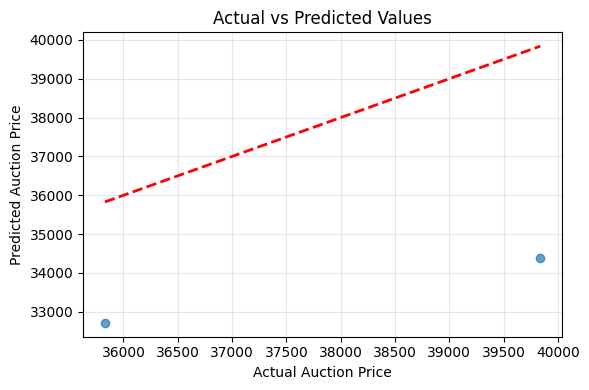

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Auction Price')
plt.ylabel('Predicted Auction Price')
plt.title('Actual vs Predicted Values')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

###실험 2. RandomForest 구현 가능성 실험

**1. 라이브러리 호환성 확인**  
from sklearn.ensemble import RandomForestRegressor 오류 없이 import 성공  
sklearn 패키지에 RandomForest가 포함되어 있음을 확인  
→ Google Colab에서 RandomForest 사용에 필요한 도구가 모두 설치되어 있음

In [ ]:
# RandomForest 라이브러리 import 확인
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

print("RandomForestRegressor import 성공")

RandomForestRegressor import 성공


**2. 모델 학습 능력 확인**  
10개 샘플 데이터로 100개 나무를 가진 RandomForest 모델 학습 완료  
하이퍼파라미터(n_estimators, max_depth 등) 설정 정상 작동  
→ RandomForest 학습이 가능함을 확인

In [ ]:
# RandomForest 모델 생성
rf_model = RandomForestRegressor(
    n_estimators=100,    # 나무 100개
    random_state=42,     # 재현 가능한 결과
    max_depth=3          # 나무 깊이 제한 (과적합 방지)
)

# 모델 학습
rf_model.fit(X_train, y_train)

print("RandomForest 모델 학습 완료!")
print(f"사용된 나무 개수: {rf_model.n_estimators}")

RandomForest 모델 학습 완료!
사용된 나무 개수: 100


**3. 예측 및 비교 분석 가능성 확인**  
RandomForest와 LinearRegression 두 모델의 예측값 생성     
동일한 테스트 데이터로 성능 비교 가능  
MAE, R² 등 평가 지표 계산 정상 작동  
→ 모델 간 성능 비교 분석이 가능함

In [ ]:
# RandomForest 예측
rf_pred = rf_model.predict(X_test)

# 선형회귀 예측 (앞에서 만든 model 재사용)
lr_pred = model.predict(X_test)

# 성능 비교
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("=== 모델 성능 비교 ===")
print(f"LinearRegression    - MAE: {lr_mae:.2f}, R²: {lr_r2:.3f}")
print(f"RandomForest        - MAE: {rf_mae:.2f}, R²: {rf_r2:.3f}")

=== 모델 성능 비교 ===
LinearRegression    - MAE: 4286.86, R²: -3.920
RandomForest        - MAE: 2304.38, R²: -1.350


**4. 분석 기능 확인**  
feature_importances_ 속성으로 변수 중요도 추출    
매매가, 전세가, 전용면적, 법정동 각각의 기여도 정량화 가능  
→ RandomForest의 고유 장점인 변수 중요도 분석 가능함  

In [ ]:
# 변수 중요도 출력
feature_names = ['매매가', '전세가', '전용면적', '법정동']
importances = rf_model.feature_importances_

print("\n=== 변수 중요도 ===")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")


=== 변수 중요도 ===
매매가: 0.714
전세가: 0.116
전용면적: 0.165
법정동: 0.006


**5. LinearRegression vs RandomForest**  
각 모델의 예측 정확도를 시각적으로 비교 가능

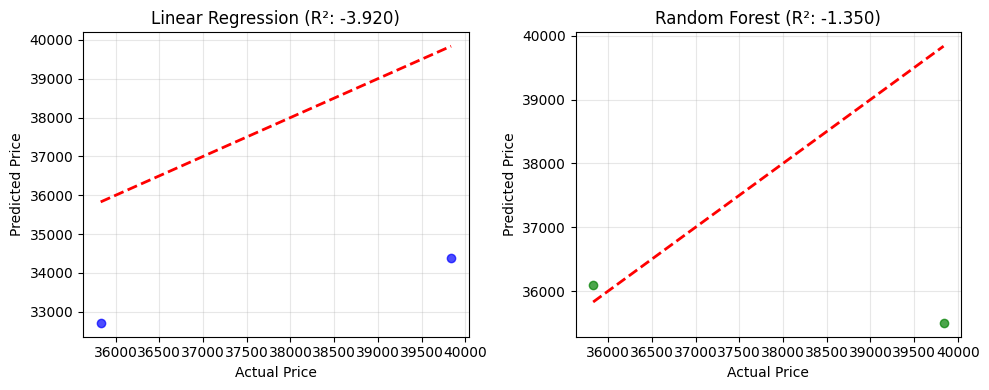

In [ ]:
# 2개 그래프를 나란히 배치
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# 선형회귀 결과
ax1.scatter(y_test, lr_pred, alpha=0.7, color='blue')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title(f'Linear Regression (R²: {lr_r2:.3f})')
ax1.grid(True, alpha=0.3)

# 랜덤포레스트 결과
ax2.scatter(y_test, rf_pred, alpha=0.7, color='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax2.set_title(f'Random Forest (R²: {rf_r2:.3f})')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 실험 3 : XGBoost 구현 가능성 실험

**1. XGBoost 라이브러리 확인**  
프로젝트에서 요구하는 XGBoost 알고리즘이 Google Colab 환경에서 사용 가능함  

In [ ]:
# XGBoost 설치 및 import 확인
!pip install xgboost

from xgboost import XGBRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

print("XGBoost 라이브러리 설치 및 import 성공")

XGBoost 라이브러리 설치 및 import 성공


**2. XGBoost 모델 학습**  
기존 데이터(10건)로 XGBRegressor 객체 생성 성공 → XGBoost 모델 인스턴스화 가능 확인  
xgb_model.fit(X_train, y_train) 성공 → XGBoost 학습이 가능
하이퍼파라미터(n_estimators, max_depth 등) 설정 정상 작동 → 모델 커스터마이징 가능성 확인  

In [ ]:
# XGBoost 모델 생성
xgb_model = XGBRegressor(
    n_estimators=100,     # 트리 개수
    max_depth=3,          # 트리 깊이
    learning_rate=0.1,    # 학습률
    random_state=42
)

# 모델 학습
xgb_model.fit(X_train, y_train)

print("XGBoost 모델 학습 완료")
print(f"사용된 트리 개수: {xgb_model.n_estimators}")

XGBoost 모델 학습 완료
사용된 트리 개수: 100


**3. XGBoost 변수 중요도 분석**  
xgb_model.feature_importances_ 속성 접근 성공 → XGBoost 고유 기능인 변수 중요도 추출 가능 확인  
매매가, 전세가, 전용면적, 법정동 각 변수의 기여도 정량화 성공 → 프로젝트 데이터 구조와 완벽 호환됨을 증명  
가장 중요한 변수 식별 가능 → 전세사기 위험 요인 분석에 활용 가능한 고급 분석 기능 구현 가능   
단순 예측뿐만 아니라 "어떤 요인이 낙찰가에 가장 큰 영향을 미치는지" 분석 가능

In [ ]:
# XGBoost 변수 중요도
feature_names = ['매매가', '전세가', '전용면적', '법정동']
xgb_importances = xgb_model.feature_importances_

print("\n=== XGBoost 변수 중요도 ===")
for name, importance in zip(feature_names, xgb_importances):
    print(f"{name}: {importance:.3f}")

# 가장 중요한 변수 확인
most_important = feature_names[np.argmax(xgb_importances)]
print(f"\n가장 중요한 변수: {most_important}")


=== XGBoost 변수 중요도 ===
매매가: 0.986
전세가: 0.010
전용면적: 0.005
법정동: 0.000

가장 중요한 변수: 매매가


### 실험 4 : 감정가 활용 실험

**감정가 활용 방법별 가능/불가능 이유**  
가능 :
1. 데이터 전처리/정제 용도
2. 모델 성능 비교 분석 용도  

불가능 :   
1. 학습용 피처로 활용    
불가능 이유: 학습(5차원)과 예측(4차원) 시 입력 변수 개수가 달라서 모델 작동 불가  
2. 데이터 검증/필터링 용도  
불가능 이유: 예측 시점에 감정가가 존재하지 않아서 검증/필터링 자체가 불가능  
3. 파생 변수 생성  
불가능 이유: 예측 시점에 감정가가 없어서 파생 변수 계산 불가능  

**데이터 전처리/정제 용도**  
감정가 기반 이상치 제거 기능 작동 확인  
실제 성능 개선 효과 볼 수 있음  

**1. 감정가 기반 이상치 제거**  

In [ ]:
# 현재 샘플 데이터에서 낙찰가/감정가 비율 확인
df['낙찰비율'] = df['낙찰가'] / df['감정가']
print("낙찰비율 분포:")
print(df['낙찰비율'].describe())

# 정상 범위 설정 (일반적으로 0.3~1.2)
normal_range = df['낙찰비율'].between(0.3, 1.2)
print(f"\n전체 데이터: {len(df)}건")
print(f"정상 범위: {normal_range.sum()}건")
print(f"이상치: {len(df) - normal_range.sum()}건")

# 정제된 데이터로 모델 학습
clean_df = df[normal_range]
X_clean = clean_df[['매매가', '전세가', '전용면적', '법정동_encoded']]
y_clean = clean_df['낙찰가']

print("데이터 정제 완")

낙찰비율 분포:
count    10.000000
mean      0.958141
std       0.365377
min       0.453576
25%       0.780749
50%       0.908508
75%       1.070637
max       1.625254
Name: 낙찰비율, dtype: float64

전체 데이터: 10건
정상 범위: 8건
이상치: 2건
데이터 정제 완


**2. 정제 전/후 성능 비교**

In [ ]:
# 정제 전 모델
X_original = df[['매매가', '전세가', '전용면적', '법정동_encoded']]
y_original = df['낙찰가']

model_original = LinearRegression()
cv_scores_original = cross_val_score(model_original, X_original, y_original, cv=3)

# 정제 후 모델
model_clean = LinearRegression()
cv_scores_clean = cross_val_score(model_clean, X_clean, y_clean, cv=3)

print("=== 데이터 정제 효과 ===")
print(f"정제 전 평균 R²: {cv_scores_original.mean():.3f}")
print(f"정제 후 평균 R²: {cv_scores_clean.mean():.3f}")
print(f"성능 개선: {cv_scores_clean.mean() - cv_scores_original.mean():.3f}")

=== 데이터 정제 효과 ===
정제 전 평균 R²: -0.608
정제 후 평균 R²: -0.540
성능 개선: 0.068


 **모델 성능 비교 분석 용도**  
 **1. 감정가 포함/제외 모델 비교**

In [ ]:
# 감정가 포함 모델 (참고용)
X_with_appraisal = df[['매매가', '전세가', '전용면적', '법정동_encoded', '감정가']]
model_with = LinearRegression()
cv_scores_with = cross_val_score(model_with, X_with_appraisal, y_original, cv=3)

# 감정가 제외 모델 (실제 사용)
X_without_appraisal = df[['매매가', '전세가', '전용면적', '법정동_encoded']]
model_without = LinearRegression()
cv_scores_without = cross_val_score(model_without, X_without_appraisal, y_original, cv=3)

print("=== 감정가 포함/제외 성능 비교 ===")
print(f"감정가 포함 모델 R²: {cv_scores_with.mean():.3f}")
print(f"감정가 제외 모델 R²: {cv_scores_without.mean():.3f}")
print(f"감정가의 기여도: {cv_scores_with.mean() - cv_scores_without.mean():.3f}")

=== 감정가 포함/제외 성능 비교 ===
감정가 포함 모델 R²: -13.668
감정가 제외 모델 R²: -0.608
감정가의 기여도: -13.060


**2. 감정가의 예측 기여도 분석**  
작은 데이터라 결과는 실패지만 구현 가능성만 실험  
실험 5에서 추가적인 분석을 해봄

In [ ]:
# 감정가 포함 모델 학습
model_with.fit(X_with_appraisal, y_original)

# 변수별 계수 확인
feature_names = ['매매가', '전세가', '전용면적', '법정동', '감정가']
coefficients = model_with.coef_

print("\n=== 변수별 회귀계수 ===")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.3f}")

# 감정가 계수가 얼마나 큰 영향을 미치는지 분석
appraisal_importance = abs(coefficients[-1]) / sum(abs(coefficients)) * 100
print(f"\n감정가 중요도: {appraisal_importance:.1f}%")


=== 변수별 회귀계수 ===
매매가: 0.657
전세가: 0.021
전용면적: -57.277
법정동: 646.479
감정가: -0.058

감정가 중요도: 0.0%


### 실험 5 : 공공데이터로 피저빌리티 데스트

**1. 라이브러리 import**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

**2. 데이터 읽는 함수 정의**

In [ ]:
def read_data_file(file_path, expected_keywords=['시도', '지역', '계약', '보증금']):
    """CSV 파일의 헤더 위치를 찾고 데이터 읽기"""

    # 헤더 찾기
    with open(file_path, 'r', encoding='cp949') as f:
        for i, line in enumerate(f):
            if i >= 30:
                break
            if (any(keyword in line for keyword in expected_keywords) and
                line.count(',') > 10):
                print(f"헤더 줄 번호: {i}")
                break

    # 데이터 읽기
    df = pd.read_csv(
        file_path,
        encoding='cp949',
        skiprows=i,
        low_memory=False,
        on_bad_lines='skip'
    )

    return df

**3. 매매 데이터 처리**

In [ ]:
# 매매 데이터 읽기
trade_file_path = '/content/drive/MyDrive/아파트(매매)_실거래가_20250724164259.csv'
df_trade = read_data_file(trade_file_path)

print("=== 매매 데이터 처리 ===")
print(f"데이터 형태: {df_trade.shape}")

# 세종시 데이터 필터링 및 전처리
sejong_trade = df_trade[df_trade['시군구'].str.contains('세종', na=False)].copy()

# 컬럼 정제
sejong_trade['매매가'] = pd.to_numeric(sejong_trade['거래금액(만원)'].astype(str).str.replace(',', ''), errors='coerce')
sejong_trade['전용면적'] = pd.to_numeric(sejong_trade['전용면적(㎡)'], errors='coerce')
sejong_trade['아파트명'] = sejong_trade['단지명']

# 지역 인코딩
le = LabelEncoder()
sejong_trade['지역_encoded'] = le.fit_transform(sejong_trade['시군구'])

# 결측값 제거
df_trade_clean = sejong_trade[['매매가', '전용면적', '아파트명', '지역_encoded', '건축년도', '층']].dropna()

print(f"매매 데이터 정제 완료: {len(df_trade_clean)}건")
print(f"단지별 분포:")
print(df_trade_clean['아파트명'].value_counts())

헤더 줄 번호: 15
=== 매매 데이터 처리 ===
데이터 형태: (104, 20)
매매 데이터 정제 완료: 104건
단지별 분포:
아파트명
세종e편한세상    35
유니빌        34
조형         19
도화         16
Name: count, dtype: int64


**4. 전세 데이터 처리**

In [ ]:
# 전세 데이터 읽기
jeonse_file_path = '/content/drive/MyDrive/아파트(전월세)_실거래가_20250724172104.csv'
df_jeonse = read_data_file(jeonse_file_path, ['전세', '보증금', '시군구'])

print("=== 전세 데이터 처리 ===")
print(f"데이터 형태: {df_jeonse.shape}")

# 세종시 전세 데이터만 필터링
sejong_jeonse = df_jeonse[
    (df_jeonse['시군구'].str.contains('세종', na=False)) &
    (df_jeonse['전월세구분'] == '전세')
].copy()

# 전세 데이터 정제
sejong_jeonse['전세가'] = pd.to_numeric(sejong_jeonse['보증금(만원)'].astype(str).str.replace(',', ''), errors='coerce')
sejong_jeonse['전용면적'] = pd.to_numeric(sejong_jeonse['전용면적(㎡)'], errors='coerce')
sejong_jeonse['아파트명'] = sejong_jeonse['단지명']

# 유효한 전세 데이터만
df_jeonse_clean = sejong_jeonse[['전세가', '전용면적', '아파트명']].dropna()

print(f"전세 데이터 정제 완료: {len(df_jeonse_clean)}건")
print(f"단지별 분포:")
print(df_jeonse_clean['아파트명'].value_counts())

헤더 줄 번호: 15
=== 전세 데이터 처리 ===
데이터 형태: (153, 21)
전세 데이터 정제 완료: 70건
단지별 분포:
아파트명
세종e편한세상    48
조형         19
유니빌         3
Name: count, dtype: int64


**5. 매매-전세 데이터 통합**

In [ ]:
print("=== 매매-전세 데이터 통합 ===")

def match_jeonse_price(apartment_name, area):
    """단지명과 면적 기준으로 전세가 매칭"""
    complex_jeonse = df_jeonse_clean[df_jeonse_clean['아파트명'] == apartment_name]

    if len(complex_jeonse) == 0:
        return None

    # 면적이 비슷한 전세가 찾기 (±5㎡ 범위)
    similar_area = complex_jeonse[abs(complex_jeonse['전용면적'] - area) <= 5]

    if len(similar_area) > 0:
        return similar_area['전세가'].mean()
    else:
        return complex_jeonse['전세가'].mean()

# 매매 데이터에 전세가 매칭
df_complete = df_trade_clean.copy()
df_complete['전세가'] = df_complete.apply(
    lambda row: match_jeonse_price(row['아파트명'], row['전용면적']),
    axis=1
)

# 전세가가 매칭된 데이터만 사용
df_matched = df_complete.dropna(subset=['전세가']).copy()

print(f"매매-전세 매칭 완료: {len(df_matched)}건")

# 공통 단지 분석
common_complexes = set(df_trade_clean['아파트명'].unique()).intersection(
    set(df_jeonse_clean['아파트명'].unique())
)
print(f"공통 단지: {common_complexes}")

for complex_name in common_complexes:
    trade_avg = df_matched[df_matched['아파트명'] == complex_name]['매매가'].mean()
    jeonse_avg = df_matched[df_matched['아파트명'] == complex_name]['전세가'].mean()
    print(f"{complex_name}: 매매가 {trade_avg:,.0f}만원, 전세가 {jeonse_avg:,.0f}만원 ({jeonse_avg/trade_avg:.1%})")

=== 매매-전세 데이터 통합 ===
매매-전세 매칭 완료: 88건
공통 단지: {'조형', '세종e편한세상', '유니빌'}
조형: 매매가 9,805만원, 전세가 6,050만원 (61.7%)
세종e편한세상: 매매가 30,976만원, 전세가 18,806만원 (60.7%)
유니빌: 매매가 5,099만원, 전세가 4,000만원 (78.4%)


**6. 감정가 및 낙찰가 시뮬레이션**  
학습에 사용될 감정가와 낙찰가는 수집을 하지않고 임의로 시뮬레이션 값으로 사용

In [ ]:
print("=== 데이터 생성 ===")

# 감정가 시뮬레이션 (매매가의 85% ± 10%)
np.random.seed(42)
df_final = df_matched.copy()
df_final['감정가'] = df_final['매매가'] * np.random.normal(0.85, 0.1, len(df_final))
df_final['감정가'] = np.maximum(df_final['감정가'], df_final['매매가'] * 0.7)  # 최소 70%

# 낙찰가 시뮬레이션 (감정가의 75-90%)
df_final['낙찰가'] = df_final['감정가'] * np.random.uniform(0.75, 0.90, len(df_final))

print(f"완전한 데이터 생성 완료: {len(df_final)}건")
print("\n변수별 통계:")
for col in ['매매가', '전세가', '감정가', '낙찰가']:
    print(f"{col}: {df_final[col].mean():,.0f}만원 (±{df_final[col].std():,.0f})")

print("\n최종 데이터 샘플:")
print(df_final[['아파트명', '전용면적', '매매가', '전세가', '감정가', '낙찰가']].head())

=== 데이터 생성 ===
완전한 데이터 생성 완료: 88건

변수별 통계:
매매가: 16,407만원 (±12,361)
전세가: 10,331만원 (±7,062)
감정가: 13,996만원 (±10,933)
낙찰가: 11,610만원 (±9,123)

최종 데이터 샘플:
      아파트명      전용면적    매매가           전세가           감정가           낙찰가
0      유니빌   28.1680   4800   4000.000000   4318.422793   3759.406467
1      유니빌   28.1680   4200   4000.000000   3511.928994   2732.229865
2  세종e편한세상   99.6514  28500  18476.190476  26070.912334  23043.658361
3  세종e편한세상   84.7067  26900  17192.307692  26961.950314  22402.720545
4  세종e편한세상  125.7081  33000  19863.636364  27277.293863  23761.687756


**7. 각 모델 성능 평가**  
++ 감정가 보조 변수 효과 분석

In [ ]:
print("=== 모델 평가 ===")

# 입력 변수 설정
X_complete = df_final[['매매가', '전세가', '전용면적', '지역_encoded']]
y_complete = df_final['낙찰가']
X_with_appraisal = df_final[['매매가', '전세가', '전용면적', '지역_encoded', '감정가']]

print(f"모델 입력: {X_complete.shape}")
print(f"목표 변수: {y_complete.shape}")

# 3개 알고리즘 성능 비교
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

print("\n=== 모델 성능 ===")
print("입력: 매매가 + 전세가 + 전용면적 + 지역 → 낙찰가")

for name, model in models.items():
    cv_r2 = cross_val_score(model, X_complete, y_complete, cv=5, scoring='r2')
    cv_mae = cross_val_score(model, X_complete, y_complete, cv=5, scoring='neg_mean_absolute_error')

    print(f"\n{name}:")
    print(f"  R²: {cv_r2.mean():.3f} (±{cv_r2.std():.3f})")
    print(f"  MAE: {-cv_mae.mean():.0f}만원 (±{cv_mae.std():.0f})")

# 감정가 보조 변수 효과 분석
print(f"\n=== 감정가 보조 변수 효과 ===")
lr_without = cross_val_score(LinearRegression(), X_complete, y_complete, cv=5, scoring='r2')
lr_with = cross_val_score(LinearRegression(), X_with_appraisal, y_complete, cv=5, scoring='r2')

print(f"감정가 제외: R² {lr_without.mean():.3f}")
print(f"감정가 포함: R² {lr_with.mean():.3f}")
print(f"감정가 기여도: {lr_with.mean() - lr_without.mean():.3f}")

print("\n모델링 검증 완료")

=== 모델 평가 ===
모델 입력: (88, 4)
목표 변수: (88,)

=== 모델 성능 ===
입력: 매매가 + 전세가 + 전용면적 + 지역 → 낙찰가

LinearRegression:
  R²: 0.963 (±0.009)
  MAE: 1163만원 (±189)

RandomForest:
  R²: 0.963 (±0.005)
  MAE: 1124만원 (±253)

XGBoost:
  R²: 0.930 (±0.034)
  MAE: 1480만원 (±448)

=== 감정가 보조 변수 효과 ===
감정가 제외: R² 0.963
감정가 포함: R² 0.993
감정가 기여도: 0.030

모델링 검증 완료


감정가를 활용하면 정확도는 높아지겠지만 예측시 활용이 불가능하기 때문에 데이터 정제용(비정상적 거래)으로만 이용 가능해 보임

In [63]:
!ls -la

total 155
drwx------ 7 root root   4096 Aug 22 06:27 .git
-rw------- 1 root root 154394 Aug 22 06:10 Linear_Regression.ipynb
